In [14]:
from IPython.core.display import HTML

# HTML("<script>Jupyter.notebook.kernel.restart()</script>")
# IMPORTSz
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from ToTimeSeries import ToTimeSeries as ts
from SimpleVisualizationTool import simpleVisualization as sv
from InputReader import Simple_Input_Reader as sim
from rgb_color_manipulator import ChannelManipulator as cm


print("done")

done


In [15]:
file_name = "t1"
file_title = "DeltaDistributionPerInterval_____" + file_name
INTERVALS_LOWER_BOUND = 0
INTERVALS_UPPER_BOUND = 257
INTERVALS_SKIP_VALUE = 16

# LAST DIMENSION MUST DIVIDE 256 WITHOUT A REMAINDER. (THE POWER OF 2)
INTERVALS = np.arange(INTERVALS_LOWER_BOUND, INTERVALS_UPPER_BOUND, INTERVALS_SKIP_VALUE)
DELTAS = np.linspace(-10, 10, num=99)

sim = sim()
cm = cm()

print("done")

done


In [16]:
# FILE READING
start = time.time()

file, frame_count, frame_width, frame_height = sim.input_to_np(input_location=file_name + '.avi', grouped_frames=1,
                                                               cut_file=0)

In [17]:
file = cm.manipulate_video(file)

end = time.time()
print("file reading and channel manipulation took {0:.2f} seconds".format(end - start))
os.system('afplay alarm.mp3')

file reading and channel manipulation took 62.82 seconds


0

In [18]:
start = time.time()
ts = ts(x_size=3, y_size=3, original_file=file, frame_count=frame_count, single_frame_width=frame_width, single_frame_height=frame_height, channel_amount=1)

file_as_bins = ts.into_time_series()

end = time.time()
print("bin division took {0:.2f} seconds".format(end - start))

bin division took 2.66 seconds


In [19]:
def _in_which_interval(val, intervals):
    for i in range(0, len(intervals) - 1):
        if intervals[i] <= val < intervals[i + 1]:
            return i


def _which_delta(val, deltas):
    val = float("{0:.1f}".format(val))
    for i_ctr, v in enumerate(deltas):
        delta_to_compare = float("{0:.1f}".format(deltas[i_ctr]))
        if val == delta_to_compare:
            return i_ctr


print("done")

done


In [20]:
# For each interval, we must find the distribution(probability) for each possible delta.
start = time.time() 

delta_distribution_per_interval = np.zeros((len(INTERVALS), len(DELTAS)))

bin_ctr = 0
while bin_ctr < ts.number_of_bins:
    frame_ctr = 0
    while frame_ctr < frame_count -1:
        bin_current_frame_average = np.average(file_as_bins[bin_ctr][frame_ctr])
        bin_next_frame_average = np.average(file_as_bins[bin_ctr][frame_ctr+1])
        current_bin_avgs_delta = bin_next_frame_average - bin_current_frame_average
        
        bin_current_interval = _in_which_interval(bin_current_frame_average, INTERVALS)
        bin_current_delta_index = _which_delta(current_bin_avgs_delta, DELTAS)
        delta_distribution_per_interval[bin_current_interval][bin_current_delta_index] += 1
        
        frame_ctr += 1
        
    bin_ctr+=1

end = time.time()    
print("gray delta amount in bin per interval took {0:.2f}".format(end - start))
os.system('afplay alarm.mp3')

gray delta amount in bin per interval took 74.50


0

In [21]:
# normalizing the delta distribution relative to the delta's interval ( Bi / sum(Bj))
start = time.time()
interval_ctr=0
while interval_ctr < len(delta_distribution_per_interval):
    delta_ctr = 0
    current_interval_sum = np.sum(delta_distribution_per_interval[interval_ctr]) 
    while delta_ctr < len(delta_distribution_per_interval[interval_ctr]):
        if current_interval_sum != 0 :
            delta_distribution_per_interval[interval_ctr][delta_ctr] = delta_distribution_per_interval[interval_ctr][delta_ctr] / current_interval_sum
        else:
            delta_distribution_per_interval[interval_ctr][delta_ctr] = 0
        delta_ctr += 1
    interval_ctr += 1
end = time.time()    
print("gray delta distribution in bin per interval took {0:.2f}".format(end - start))
os.system('afplay alarm.mp3')

gray delta distribution in bin per interval took 0.00


0

In [22]:
# print(np.sum(delta_distribution_per_interval[3]))
legend = ["{0} - {1}".format(INTERVALS[i], INTERVALS[i+1]) for i in range(1, len(INTERVALS)-1)]
colors = [(INTERVALS[i]/256, INTERVALS[i]/256, INTERVALS[i]/256) for i in range(len(INTERVALS))]

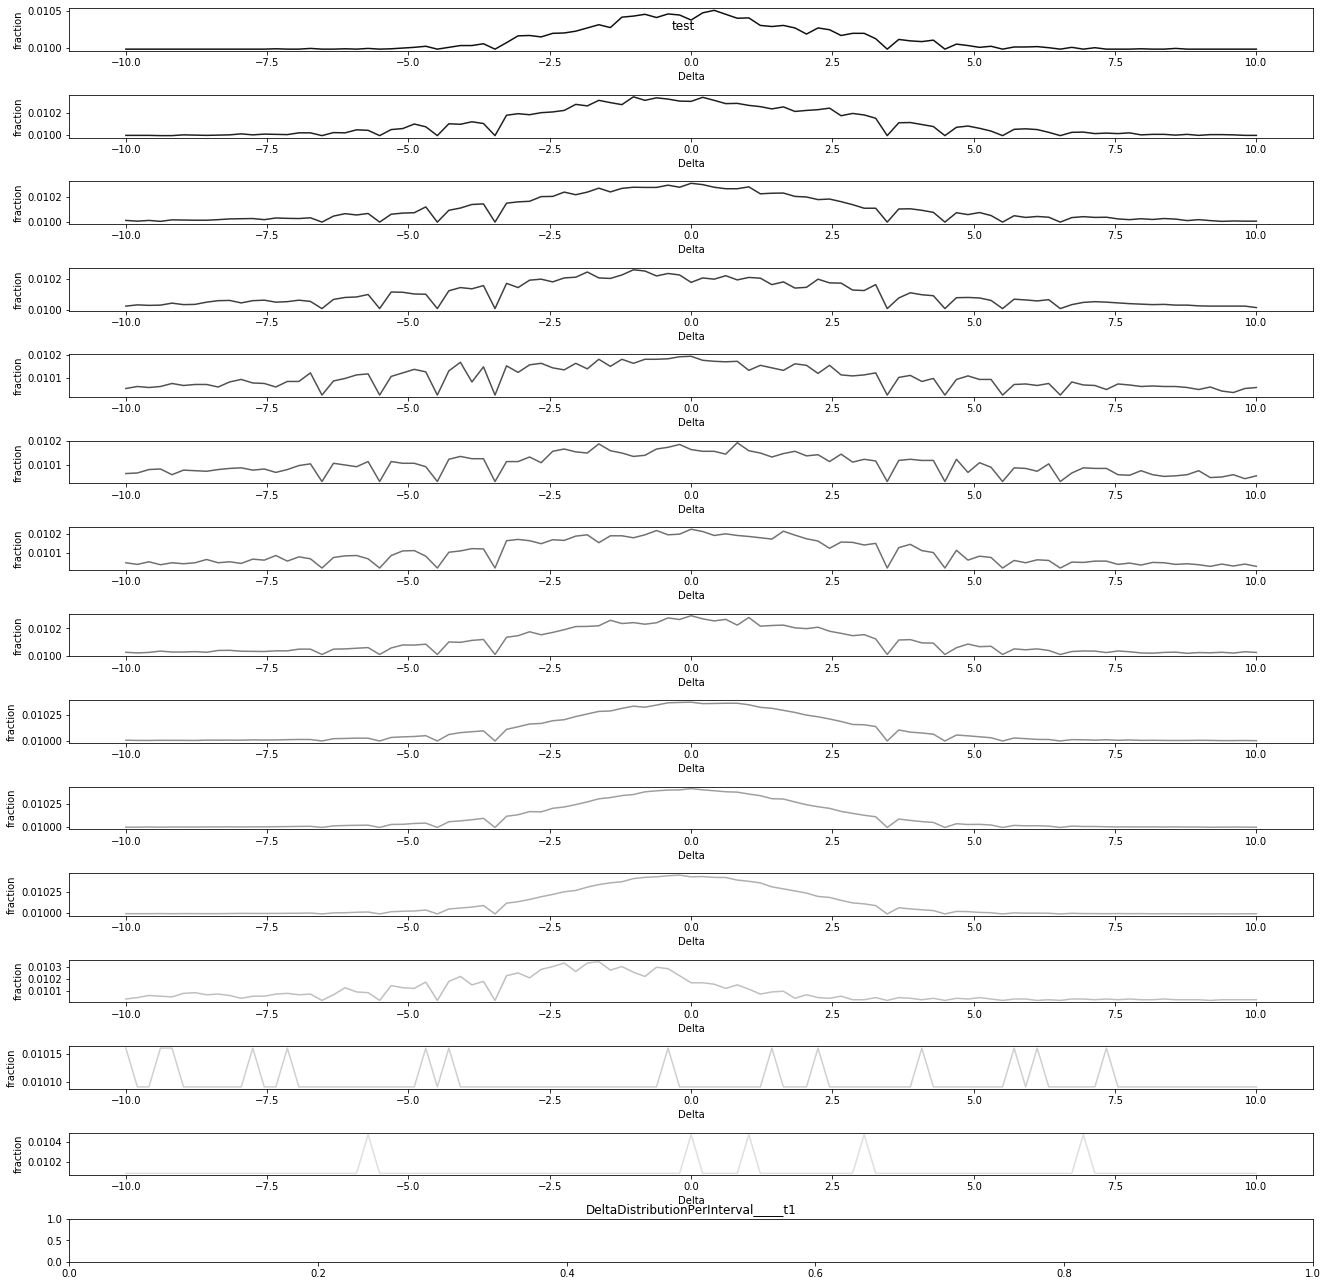

In [25]:
start_of_interest = 1
end_of_interest = 15
fig, axs = plt.subplots(nrows=end_of_interest, figsize=(2^16, 2^16))
plt.title(file_title)
x = DELTAS
# plt.subplot()
fig.suptitle("test")
fig.tight_layout()
for i in range(start_of_interest, end_of_interest ):
    plot = delta_distribution_per_interval[i]
    axs[i-start_of_interest].plot(x, plot, markersize=1, color=colors[i])
    axs[i-start_of_interest].set(xlabel="Delta", ylabel="fraction")

In [27]:
fig.savefig(file_title+"1.png", dpi=300, bbox_inches = "tight")



In [ ]:
# diffrent plotting devices:

# # plotting
# delta_distribution_per_interval = delta_distribution_per_interval[1:]
# legend = ["{0} - {1}".format(INTERVALS[i], INTERVALS[i+1]) for i in range(1, len(INTERVALS)-1)]
# colors = [(INTERVALS[i]/256, INTERVALS[i]/256, INTERVALS[i]/256) for i in range(len(INTERVALS))]
# 
# start_of_interest = 1
# end_of_interest = 16
# fig, axs = plt.subplots(nrows=end_of_interest, figsize=(2^16, 2^16))
# plt.title(file_title)
# x = DELTAS
# fig.suptitle("test")
# fig.tight_layout()
# for i in range(start_of_interest, end_of_interest ):
#     plot = delta_distribution_per_interval[i]
#     axs[i-start_of_interest].plot(x, plot, markersize=1, color=colors[i])
#     axs[i-start_of_interest].set(xlabel="Delta", ylabel="fraction")
#         


In [ ]:
# saving the file:
# fig.savefig("{0}2.png".format(file_name), dpi=300, bbox_inches = "tight")


In [ ]:
# from tempfile import TemporaryFile

# outfile = TemporaryFile()
# x = np.arange(10)
# np.save(outfile, x)